# Pre processing of the Data 

## Basic exploration of the Dataset 

Here we will initiate the exploration of our data that can be found in the file radar_data.nc

In [16]:
import xarray as xr
import numpy as np
import netCDF4
import scipy 

path = '/Users/lacottepaul/Desktop/weather-nowcasting/data/radar_data.nc'
ds = xr.open_dataset(path)
var = list(ds.data_vars)[0]  # or ref = ds['reflectivity'] straight away but lets be generic 
ref = ds[var]  
data = ref.values  
#lets look at the shape and coordinates
print(ds)

<xarray.Dataset> Size: 820kB
Dimensions:       (time: 50, y: 64, x: 64)
Coordinates:
  * time          (time) datetime64[ns] 400B 2025-06-01T10:00:00 ... 2025-06-...
  * y             (y) int32 256B 0 1 2 3 4 5 6 7 8 ... 56 57 58 59 60 61 62 63
  * x             (x) int32 256B 0 1 2 3 4 5 6 7 8 ... 56 57 58 59 60 61 62 63
Data variables:
    reflectivity  (time, y, x) float32 819kB 0.1051 0.1048 ... 0.08341 0.08341
Attributes:
    description:  Synthetic radar reflectivity data.


We can take a closer look at the reflectivity now

In [23]:
ref = ds['reflectivity']

In [24]:
print("Min:", float(ref.min()))
print("Max:", float(ref.max()))
print("Mean:", float(ref.mean()))
print("Std Dev:", float(ref.std()))
print("Nombre de NaNs:", np.isnan(ref.values).sum())

Min: 0.052221931517124176
Max: 1.0
Mean: 0.11554119735956192
Std Dev: 0.1310371607542038
Nombre de NaNs: 0


As we can see we have something that match reflectivity data with a really low mean and a high max. We can note that the data is most likely already normalized from Dbz to a [0,1] window. Probably a log based scale. 
We can also say thanks to the database engineer because as we can see we have 0 nans. 

Let's have a look at the firsts time steps available. 

In [26]:
print("Timestamps available:")
print(ref.time.values[:5])  # first five 

Timestamps available:
['2025-06-01T10:00:00.000000000' '2025-06-01T10:05:00.000000000'
 '2025-06-01T10:10:00.000000000' '2025-06-01T10:15:00.000000000'
 '2025-06-01T10:20:00.000000000']


There is a lot of unecessary 0 that we can erase to gain clarity 

In [27]:
times = ref.time.values.astype('datetime64[m]')
print(times[:5])

['2025-06-01T10:00' '2025-06-01T10:05' '2025-06-01T10:10'
 '2025-06-01T10:15' '2025-06-01T10:20']


Next we can have a look at a reflectivity image at t=0 

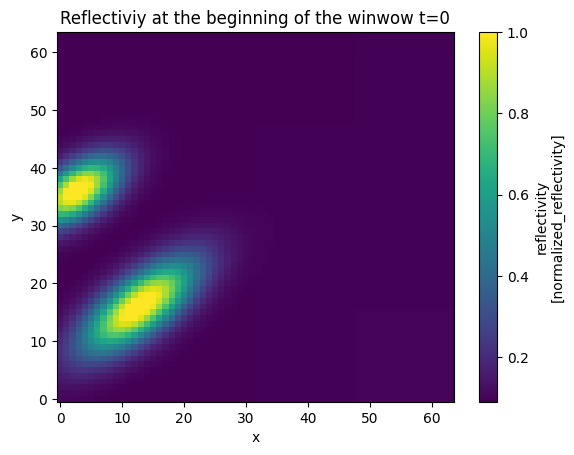

In [33]:
ref.isel(time=0).plot(cmap='viridis')
plt.title("Reflectiviy at the beginning of the winwow t=0")
plt.show()



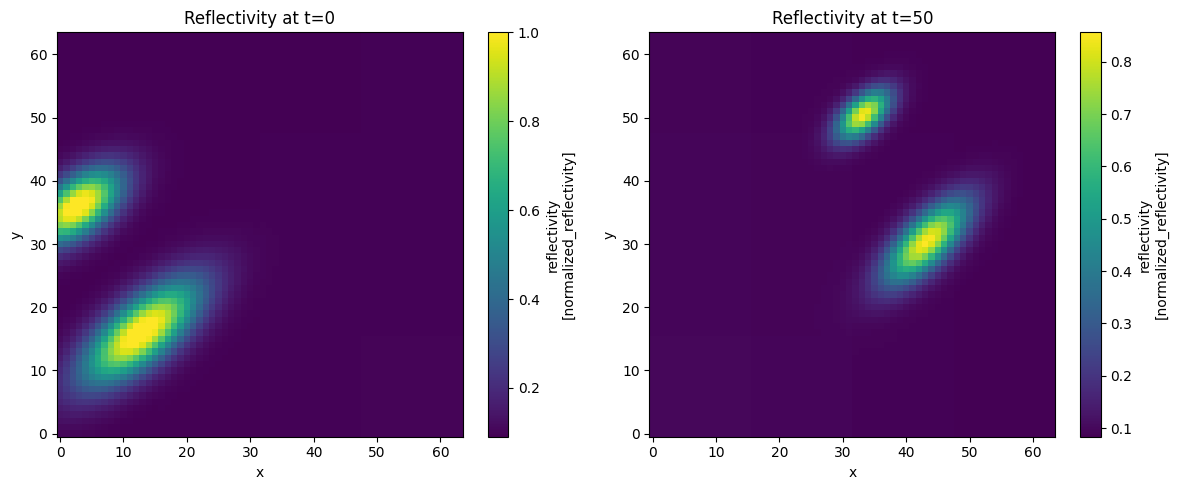

In [40]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
# T0 image
ref.isel(time=0).plot(ax=axs[0], cmap='viridis')
axs[0].set_title("Reflectivity at t=0")

# T50 image
ref.isel(time=49).plot(ax=axs[1], cmap='viridis')
axs[1].set_title("Reflectivity at t=50")

plt.tight_layout()
plt.show()

Thanks to this plot we can deduct that we are now studying one meteorological situation, most likely the advection of an occurence of precipitation from the south-ouest to the north-east. 

Now that we have done a brief exploration of the dataset we can start the next phase 

## Pre processing for training 